Reference: https://github.com/bnsreenu/python_for_microscopists

In [2]:
pip install opencv-python-headless


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import cv2

In [4]:
img=cv2.imread("leaf.jpg")

In [5]:
print(img.shape)

(443, 590, 3)


In [6]:
img2=img.reshape((-1,3))

In [7]:
from sklearn.mixture import GaussianMixture as GMM

Define the model, fit the model and predict the data

In [9]:
gmm_model=GMM(n_components=4,covariance_type='tied').fit(img2)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [10]:
gmm_labels=gmm_model.predict(img2)

In [11]:
original_shape=img.shape
segmented=gmm_labels.reshape(original_shape[0], original_shape[1])

In [12]:
cv2.imwrite("segmented_leaf.jpg",segmented)

True

How to decide the number of parameters? one can use Akaike Information Criteria (AIC) or Bayesian Information Criteria (BIC)

Lets try say 10 components

In [15]:
n_components=np.arange(1,10)
gmm_models=[GMM(n,covariance_type='tied').fit(img2) for n in n_components]


Text(0.5, 0, 'n_components')

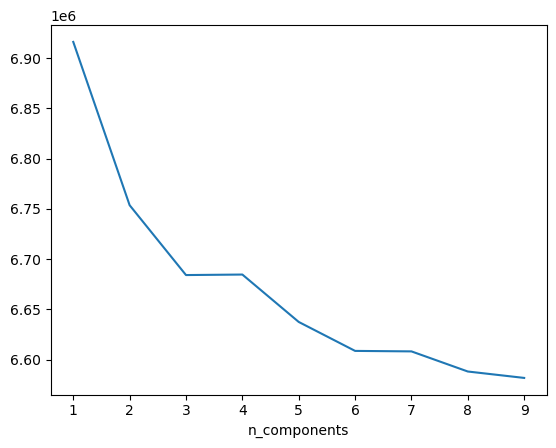

In [16]:
from matplotlib import pyplot as plt
plt.plot(n_components,[m.bic(img2) for m in gmm_models],label="BIC")
plt.xlabel("n_components")

Look at the penalty term and use as guide!